<a href="https://colab.research.google.com/github/farnazcs/quantum_circuit/blob/main/tutorial4%265.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 858.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.3 MB/s eta 0:00:00
   

In [13]:
cx_pattern = "11001"
n = len(cx_pattern)
myqubits = cirq.LineQubit.range(n+1)
print(myqubits)
cx_qubits = [myqubits[x] for x in range(n) if cx_pattern[x] == "1"]
target_qubit = myqubits[-1]

mycircuit = cirq.Circuit(
    [
        cirq.reset_each(*myqubits),
        cirq.X(target_qubit),
        cirq.Moment(cirq.H.on_each(myqubits)),
        cirq.CNOT.on_each(zip(cx_qubits, [target_qubit]*len(cx_qubits))),
        cirq.Moment(cirq.H.on_each(myqubits))
    ]
)


meas_gates = cirq.Moment([cirq.measure(qubit) for qubit in myqubits])
mycircuit.append(meas_gates)

#now simulate
sim = cirq.Simulator()
result= sim.run(mycircuit, repetitions=2)

print(result)
print(mycircuit)

[cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(4), cirq.LineQubit(5)]
q(0)=11
q(1)=11
q(2)=00
q(3)=00
q(4)=11
q(5)=11
0: ───R───────H───@───────────H───M───
                  │
1: ───R───────H───┼───@───────H───M───
                  │   │
2: ───R───────H───┼───┼───────H───M───
                  │   │
3: ───R───────H───┼───┼───────H───M───
                  │   │
4: ───R───────H───┼───┼───@───H───M───
                  │   │   │
5: ───R───X───H───X───X───X───H───M───


In [35]:
def get_circuit(resete = False, measurements = False):
      cx_pattern = "11001"

      n = len(cx_pattern)
      myqubits = cirq.LineQubit.range(n+1)
      #print(myqubits)
      cx_qubits = [myqubits[x] for x in range(n) if cx_pattern[x] == "1"]
      target_qubit = myqubits[-1]

      mycircuit = cirq.Circuit()

      if resete:
        mycircuit.append([cirq.reset(qubit) for qubit in myqubits]),

      mycircuit.append(

        [
          cirq.reset_each(*myqubits),
          cirq.X(target_qubit),
          cirq.Moment(cirq.H.on_each(myqubits)),
          cirq.CNOT.on_each(zip(cx_qubits, [target_qubit]*len(cx_qubits))),
          cirq.Moment(cirq.H.on_each(myqubits))
        ],
      )

      if measurements:
        mycircuit.append(cirq.Moment(cirq.measure(*myqubits[:-1], key = "meas_qubits")))

      return mycircuit



In [36]:
circuit_without_reset_measurements = get_circuit(resete= False, measurements= False)
circuit_with_reset_measurements = get_circuit(resete= True, measurements= True)
print("circuit without reset measurement:")
print(circuit_without_reset_measurements)
print("circuit with reset measurements:")
print(circuit_with_reset_measurements)

circuit without reset measurement:
0: ───R───────H───@───────────H───
                  │
1: ───R───────H───┼───@───────H───
                  │   │
2: ───R───────H───┼───┼───────H───
                  │   │
3: ───R───────H───┼───┼───────H───
                  │   │
4: ───R───────H───┼───┼───@───H───
                  │   │   │
5: ───R───X───H───X───X───X───H───
circuit with reset measurements:
0: ───R───R───────H───@───────────H───M('meas_qubits')───
                      │               │
1: ───R───R───────H───┼───@───────H───M──────────────────
                      │   │           │
2: ───R───R───────H───┼───┼───────H───M──────────────────
                      │   │           │
3: ───R───R───────H───┼───┼───────H───M──────────────────
                      │   │           │
4: ───R───R───────H───┼───┼───@───H───M──────────────────
                      │   │   │
5: ───R───R───X───H───X───X───X───H──────────────────────


In [41]:
#now simulate
sim = cirq.Simulator()
result = sim.run(circuit_with_reset_measurements, repetitions= 50)
print(result)

meas_qubits=11111111111111111111111111111111111111111111111111, 11111111111111111111111111111111111111111111111111, 00000000000000000000000000000000000000000000000000, 00000000000000000000000000000000000000000000000000, 11111111111111111111111111111111111111111111111111


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

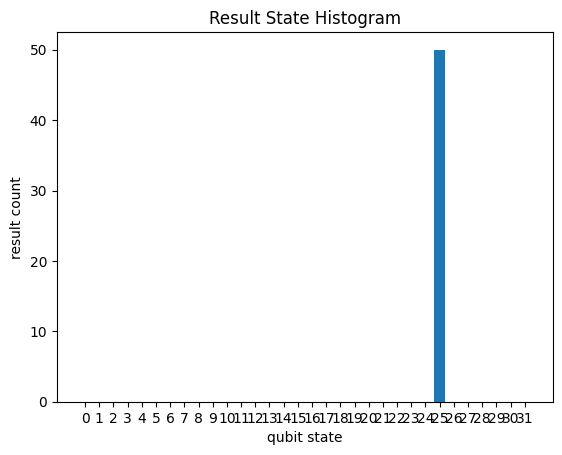

In [23]:
cirq.plot_state_histogram(result)

In [37]:
def get_binary_list(num_digits):
  return[format(x,"b").zfill(num_digits) for x in range(2**num_digits)]

example_list = get_binary_list(3)
print(example_list)

['000', '001', '010', '011', '100', '101', '110', '111']


<Axes: title={'center': 'Result State Histogram'}, xlabel='measurements Outcome', ylabel='result count'>

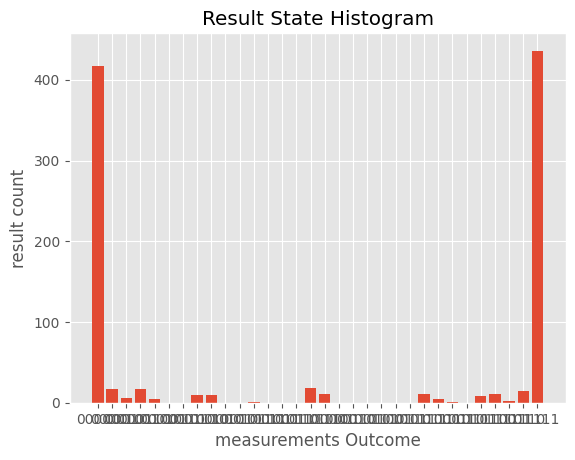

In [38]:
cirq.plot_state_histogram(result, tick_label=get_binary_list(5), xlabel= "measurements Outcome")

<Axes: title={'center': 'Result State Histogram'}, xlabel='measurements Outcome', ylabel='result count'>

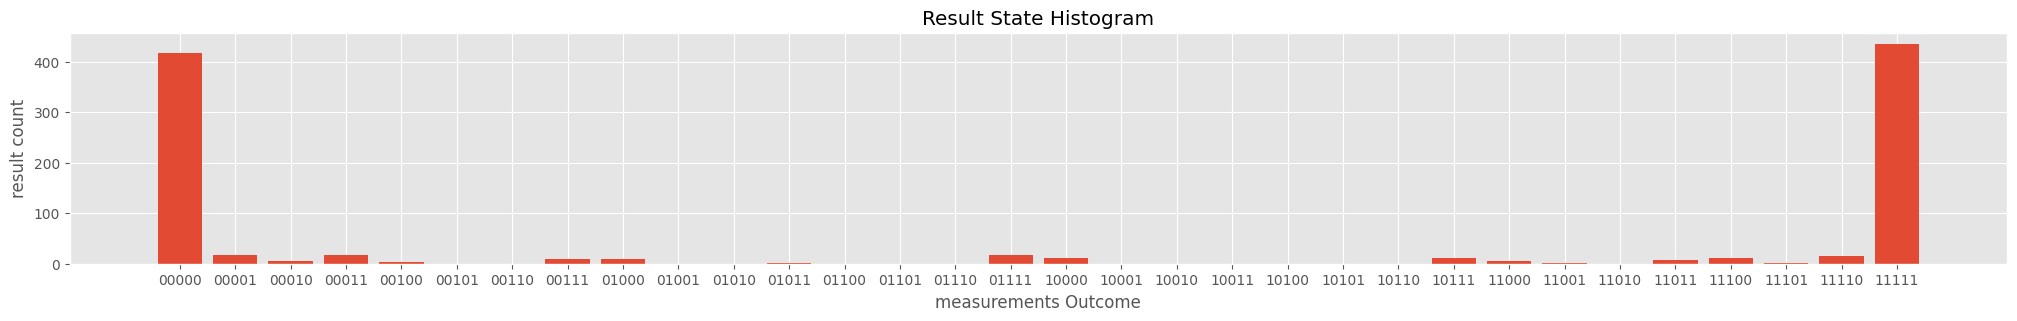

In [40]:
import matplotlib.pyplot as plt

myfig, myaxis = plt.subplots(nrows=1, ncols=1, figsize=(25,3))

cirq.plot_state_histogram(result, tick_label=get_binary_list(5), xlabel="measurements Outcome", ax=myaxis)

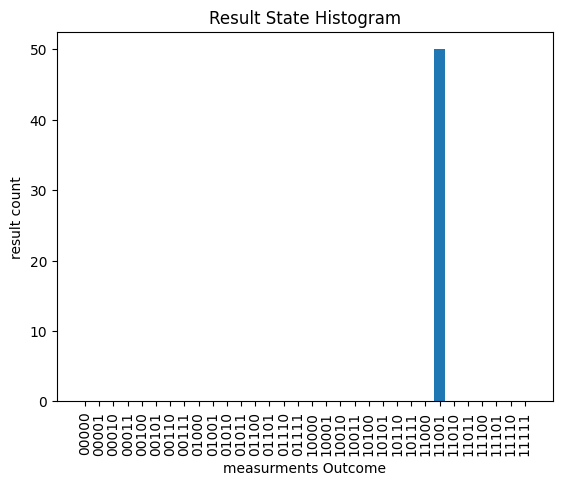

In [33]:
cirq.plot_state_histogram(result, tick_label=get_binary_list(5), xlabel="measurements Outcome").tick_params(axis="x", labelrotation=90)

<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

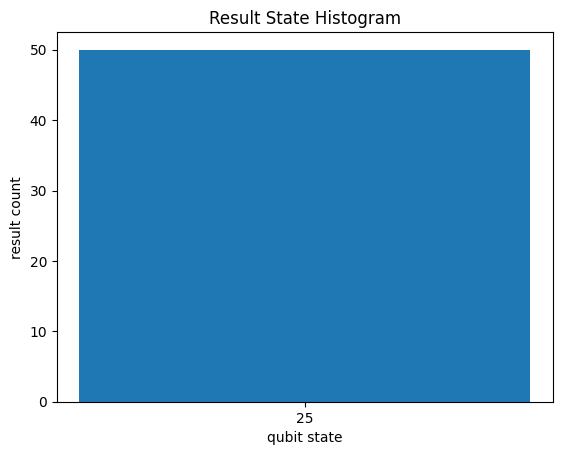

In [36]:
nonzero = result.histogram(key = "meas_qubits")
cirq.plot_state_histogram(nonzero)

In [37]:
int(b"11001", 2)

25

In [38]:
!pip install --quiet qsimcirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 12.3 MB/s eta 0:00:00


In [43]:
import qsimcirq
sim = qsimcirq.QSimSimulator()
result = sim.run(circuit_with_reset_measurements, repetitions= 1000)

<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

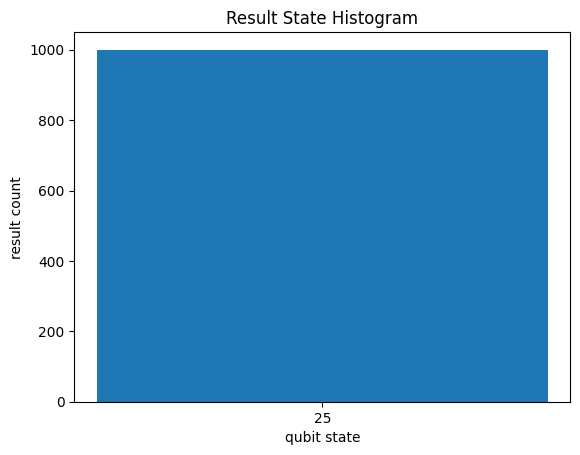

In [44]:
nonzero = result.histogram(key = "meas_qubits")
cirq.plot_state_histogram(nonzero)

In [46]:
sim = cirq.Simulator()

result = sim.simulate(circuit_without_reset_measurements)
print(result)

measurements: (no measurements)

qubits: (cirq.LineQubit(4), cirq.LineQubit(1), cirq.LineQubit(0), cirq.LineQubit(5))
output vector: |1111⟩

qubits: (cirq.LineQubit(2),)
output vector: |0⟩

qubits: (cirq.LineQubit(3),)
output vector: |0⟩

phase:
output vector: |⟩


In [47]:
result = sim.simulate_moment_steps(circuit_without_reset_measurements)

for moment in result:
  print(cirq.dirac_notation(moment.state_vector()))

|000000⟩
|000001⟩
0.12|000000⟩ - 0.12|000001⟩ + 0.12|000010⟩ - 0.12|000011⟩ + 0.12|000100⟩ - 0.12|000101⟩ + 0.12|000110⟩ - 0.12|000111⟩ + 0.12|001000⟩ - 0.12|001001⟩ + 0.12|001010⟩ - 0.12|001011⟩ + 0.12|001100⟩ - 0.12|001101⟩ + 0.12|001110⟩ - 0.12|001111⟩ + 0.12|010000⟩ - 0.12|010001⟩ + 0.12|010010⟩ - 0.12|010011⟩ + 0.12|010100⟩ - 0.12|010101⟩ + 0.12|010110⟩ - 0.12|010111⟩ + 0.12|011000⟩ - 0.12|011001⟩ + 0.12|011010⟩ - 0.12|011011⟩ + 0.12|011100⟩ - 0.12|011101⟩ + 0.12|011110⟩ - 0.12|011111⟩ + 0.12|100000⟩ - 0.12|100001⟩ + 0.12|100010⟩ - 0.12|100011⟩ + 0.12|100100⟩ - 0.12|100101⟩ + 0.12|100110⟩ - 0.12|100111⟩ + 0.12|101000⟩ - 0.12|101001⟩ + 0.12|101010⟩ - 0.12|101011⟩ + 0.12|101100⟩ - 0.12|101101⟩ + 0.12|101110⟩ - 0.12|101111⟩ + 0.12|110000⟩ - 0.12|110001⟩ + 0.12|110010⟩ - 0.12|110011⟩ + 0.12|110100⟩ - 0.12|110101⟩ + 0.12|110110⟩ - 0.12|110111⟩ + 0.12|111000⟩ - 0.12|111001⟩ + 0.12|111010⟩ - 0.12|111011⟩ + 0.12|111100⟩ - 0.12|111101⟩ + 0.12|111110⟩ - 0.12|111111⟩
0.12|000000⟩ - 0.12|0000

In [49]:
sim = qsimcirq.QSimSimulator()

result = sim.simulate(circuit_with_reset_measurements)
print(result)

measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(4), cirq.LineQubit(5))
output vector: |110011⟩


In [39]:
circuit_without_reset_measurements.unitary()

TypeError: Operation without a known matrix or decomposition: cirq.ResetChannel()(cirq.LineQubit(0))

In [53]:
circuit_without_reset_measurements_decomposed = cirq.Circuit(cirq.decompose(circuit_without_reset_measurements))
unitary_matrix = circuit_without_reset_measurements_decomposed.unitary()
print(unitary_matrix)


TypeError: Operation without a known matrix or decomposition: cirq.ResetChannel()(cirq.LineQubit(0))

In [54]:
cirq.unitary(circuit_with_reset_measurements)

TypeError: cirq.unitary failed. Value doesn't have a (non-parameterized) unitary effect.

type: <class 'cirq.circuits.circuit.Circuit'>
value: cirq.Circuit([
    cirq.Moment(
        cirq.ResetChannel()(cirq.LineQubit(0)),
        cirq.ResetChannel()(cirq.LineQubit(1)),
        cirq.ResetChannel()(cirq.LineQubit(2)),
        cirq.ResetChannel()(cirq.LineQubit(3)),
        cirq.ResetChannel()(cirq.LineQubit(4)),
        cirq.ResetChannel()(cirq.LineQubit(5)),
    ),
    cirq.Moment(
        cirq.ResetChannel()(cirq.LineQubit(0)),
        cirq.ResetChannel()(cirq.LineQubit(1)),
        cirq.ResetChannel()(cirq.LineQubit(2)),
        cirq.ResetChannel()(cirq.LineQubit(3)),
        cirq.ResetChannel()(cirq.LineQubit(4)),
        cirq.ResetChannel()(cirq.LineQubit(5)),
    ),
    cirq.Moment(
        cirq.X(cirq.LineQubit(5)),
    ),
    cirq.Moment(
        cirq.H(cirq.LineQubit(0)),
        cirq.H(cirq.LineQubit(1)),
        cirq.H(cirq.LineQubit(2)),
        cirq.H(cirq.LineQubit(3)),
        cirq.H(cirq.LineQubit(4)),
        cirq.H(cirq.LineQubit(5)),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.LineQubit(0), cirq.LineQubit(5)),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.LineQubit(1), cirq.LineQubit(5)),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.LineQubit(4), cirq.LineQubit(5)),
    ),
    cirq.Moment(
        cirq.H(cirq.LineQubit(0)),
        cirq.H(cirq.LineQubit(1)),
        cirq.H(cirq.LineQubit(2)),
        cirq.H(cirq.LineQubit(3)),
        cirq.H(cirq.LineQubit(4)),
        cirq.H(cirq.LineQubit(5)),
    ),
    cirq.Moment(
        cirq.measure(cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(4), key=cirq.MeasurementKey(name='meas_qubits')),
    ),
])

The value failed to satisfy any of the following criteria:
- A `_unitary_(self)` method that returned a value besides None or NotImplemented.
- A `_decompose_(self)` method that returned a list of unitary operations.
- An `_apply_unitary_(self, args) method that returned a value besides None or NotImplemented.

Build GHZ circuit

In [2]:
import cirq

def make_GHZ(num_qubits, measurements = True):
  myqubits = cirq.LineQubit.range(num_qubits)
  GHZ_circuit = cirq.Circuit([
      cirq.Moment([cirq.H(myqubits[0])])
  ])

  for x in range(num_qubits-1):
    GHZ_circuit.append(cirq.CNOT(myqubits[x], myqubits[x+1]))

  if measurements:
    GHZ_circuit.append(cirq.Moment(cirq.measure_each(*myqubits)))

  return GHZ_circuit

In [3]:
GHZ_5q = make_GHZ(5)
print(GHZ_5q)

0: ───H───@───────────────M───
          │
1: ───────X───@───────────M───
              │
2: ───────────X───@───────M───
                  │
3: ───────────────X───@───M───
                      │
4: ───────────────────X───M───


q(0)=11000011011010001011000011110001000111111101110010101100001110000100101011010111101110010011000011100100011110111000111111010000001111010100110010110010000110011010101011110010111100011000010010011010111001000100011011110010110000100001001010111001100101111111101111110000010111101010110001111100011001000010101111110011010111000000001000111011011101110100000110000011010010110110001001110011001001110111100101010100101100101110010101001000111100000010111011100001100100000100100101110101101011000000111001111111110011001110101100100110101000010011111001010111010011001110011010100100010111011100111100101011100101101100011001011111100010011110011011000101001101011000100101010110110011000000110011101000011110000101000111100101110001001101111110010001011101000110100001101100010100010101000100011001001011011000100111000101001000010101011101001100101000010000110101110011010110100101011000001010101001000000000001011111000010010101011010011001110001000100011101100111011011100101110100001000111

<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

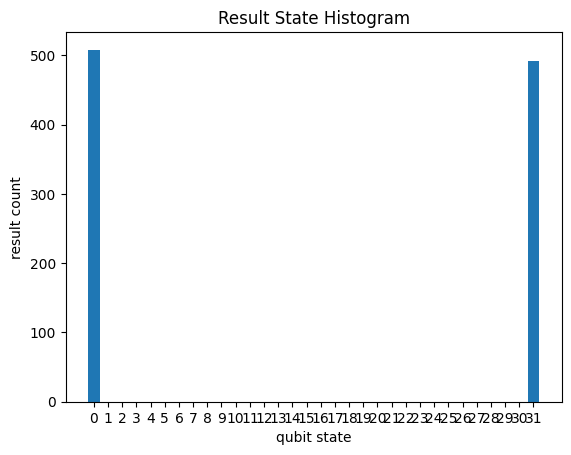

In [10]:
sim = cirq.Simulator()
result = sim.run(GHZ_5q, repetitions=1000)
print(result)
cirq.plot_state_histogram(result)

Noisy simulation with indevidula nois event

In [11]:
#Noisy simulation with individual noise event

def make_GHZ_withbitflips(num_qubits, measurements = True):
  myqubits = cirq.LineQubit.range(num_qubits)
  GHZ_circuit = cirq.Circuit([
      cirq.Moment([cirq.H(myqubits[0])])
  ])

  for x in range(num_qubits-1):
    GHZ_circuit.append([cirq.CNOT(myqubits[x], myqubits[x+1]), cirq.bit_flip(p=0.1)(myqubits[x+1]) ])

  if measurements:
    GHZ_circuit.append(cirq.Moment(cirq.measure_each(*myqubits)))

  return GHZ_circuit



0: ───H───@───────────────────────────────────────────────────────M───
          │
1: ───────X───BF(0.1)───@─────────────────────────────────────────M───
                        │
2: ─────────────────────X───BF(0.1)───@───────────────────────────M───
                                      │
3: ───────────────────────────────────X───BF(0.1)───@─────────────M───
                                                    │
4: ─────────────────────────────────────────────────X───BF(0.1)───M───
q(0)=1100011110010101010111101100100101110011101011001011010001010101110000101100001001111110011111111000010111110101011000011010011010010010111101001110101100100011000110000111101110111011000010101110011100111000011101100100000100011000001000000010011001001110111011000100000000110000011000101010100000001011100101100011011010101111100011110011100100100101000111000101010111101010100110101111100100101001000111011010001111110100110111000011000110111100100100011000111010000110100001011001111001110010010000110010

<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

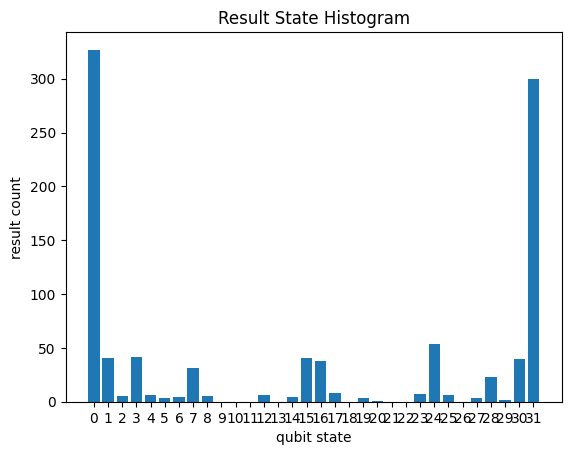

In [12]:
GHZ_5q_withbitflips = make_GHZ_withbitflips(5)
print(GHZ_5q_withbitflips)

result = sim.run(GHZ_5q_withbitflips, repetitions= 1000)
print(result)
cirq.plot_state_histogram(result)

In [15]:
#Noisy simulation with a Global Noise Model

depol_noise_model = cirq.NoiseModel.from_noise_model_like(cirq.depolarize(p=0.01))


#option 1: depol_noise_model.noisy_operation
#option 2: depol_noise_model.noisy_moment
#option 3: depol_noise_model.noisy_moments
# we are going use option 3

myqubits = cirq.LineQubit.range(5)
GHZ_5q_with_noisemodel = cirq.Circuit(depol_noise_model.noisy_moments(GHZ_5q, system_qubits=myqubits))
print(GHZ_5q_with_noisemodel)

0: ───H───D(0.01)[cirq.VirtualTag()]───@───D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───M───D(0.01)[cirq.VirtualTag()]───
                                       │
1: ───────D(0.01)[cirq.VirtualTag()]───X───D(0.01)[cirq.VirtualTag()]───@───D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───M───D(0.01)[cirq.VirtualTag()]───
                                                                        │
2: ───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───X───D(0.01)[cirq.VirtualTag()]───@───D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───M───D(0.01)[cirq.VirtualTag()]───
                                                                                                         │
3: ───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───X───D(0.01)[cirq.VirtualTag()]───@───D(0.01)[cirq.VirtualT

In [17]:
depol_noise = cirq.depolarize(p=0.01)
GHZ_5q_with_noise = GHZ_5q.with_noise(depol_noise)
print(GHZ_5q_with_noise)

0: ───H───D(0.01)[cirq.VirtualTag()]───@───D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───M───D(0.01)[cirq.VirtualTag()]───
                                       │
1: ───────D(0.01)[cirq.VirtualTag()]───X───D(0.01)[cirq.VirtualTag()]───@───D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───M───D(0.01)[cirq.VirtualTag()]───
                                                                        │
2: ───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───X───D(0.01)[cirq.VirtualTag()]───@───D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───M───D(0.01)[cirq.VirtualTag()]───
                                                                                                         │
3: ───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───────D(0.01)[cirq.VirtualTag()]───X───D(0.01)[cirq.VirtualTag()]───@───D(0.01)[cirq.VirtualT

<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

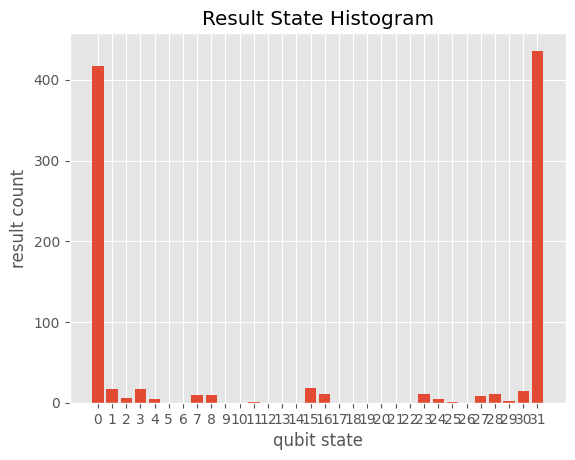

In [26]:
result = sim.run(GHZ_5q_with_noisemodel, repetitions=1000)
cirq.plot_state_histogram(result)

In [28]:
import cirq_google as cg

!pip install --quiet qsimcirq
import qsimcirq


In [25]:
# Choose a processor ("rainbow" or "weber")
processor_id = "weber"

In [31]:
import cirq_google
# Load the median device noise calibration for your selected processor.
cal = cirq_google.engine.load_median_device_calibration(processor_id)
# Create the noise properties object.
noise_props = cirq_google.noise_properties_from_calibration(cal)
# Create a noise model from the noise properties.
noise_model = cirq_google.NoiseModelFromGoogleNoiseProperties(noise_props)
# Prepare a qsim simulator using the noise model.
sim = qsimcirq.QSimSimulator(noise=noise_model)

In [32]:
# Package the simulator and device in an Engine.
# The device object
device = cirq_google.engine.create_device_from_processor_id(processor_id)
# The simulated processor object
sim_processor = cirq_google.engine.SimulatedLocalProcessor(
    processor_id=processor_id, sampler=sim, device=device, calibrations={cal.timestamp // 1000: cal}
)
# The virtual engine
sim_engine = cirq_google.engine.SimulatedLocalEngine([sim_processor])
print(
    "Your quantum virtual machine",
    processor_id,
    "is ready, here is the qubit grid:",
    "\n========================\n",
)
print(sim_engine.get_processor(processor_id).get_device())

Your quantum virtual machine weber is ready, here is the qubit grid: 

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                                    (2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                                    │        │        │        │        │
                                    │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4,

In [33]:
q0 = cirq.GridQubit(4, 4)
q1 = cirq.GridQubit(4, 5)
circuit = cirq.Circuit(cirq.X(q0), cirq.SQRT_ISWAP(q0, q1), cirq.measure([q0, q1], key="measure"))

results = sim_engine.get_sampler(processor_id).run(circuit, repetitions=3000)

print(results.histogram(key="measure"))

Counter({2: 1410, 1: 1266, 0: 270, 3: 54})
